# Project 09. Clustering Grocery Items

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Table of Contents
  1. [Read Data](#read_data)
  2. [Question 1](#question1)
  3. [Question 2](#question2)
  4. [Question 3: Create Clusters](#question3:createclusters)

<a id='read_data'></a>
## Read Data

In [145]:
item_to_id = pd.read_csv('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/9. grocery/item_to_id.csv')
item_to_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [146]:
item_to_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item_name  48 non-null     object
 1   Item_id    48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [147]:
purchase_history = pd.read_csv('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/9. grocery/purchase_history.csv')
purchase_history.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [148]:
purchase_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39474 non-null  int64 
 1   id       39474 non-null  object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


<a id='Data Processing'></a>
## Data Processing

In [149]:
# Built a function to calculate how many times the user bought one item
from collections import Counter
def item_counts(data):
    # transfer the item id from comma-separated list of items to a list
    item_ids = data['id'].str.split(',').sum()
    # to calculate the occurences of all items in a list, there are two menthods: 
    # 1. list comprehension: [[x, data.count(x)[] for x in data]
    # 2. From collections import Counter, Counter(int(id)) for id in item_ids
    return pd.Series(Counter(int(id) for id in item_ids))

In [150]:
user_item_counts = purchase_history.groupby('user_id').apply(item_counts).unstack(fill_value=0)
user_item_counts.head(5)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [151]:
# Here is another method to show how to calculate how many times the user bought one item
from collections import Counter
def item_counts_2(data):
    # transfer the item id from comma-separated list of items to a list
    item_ids = data['id'].str.split(',').sum()
    # to calculate the occurences of all items in a list, two menthods: 
    # 1. list comprehension: [[x, data.count(x)[] for x in data]
    # 2. From collections import Counter, Counter(int(id)) for id in item_ids
    return pd.Series(dict((id,item_ids.count(int(id))) for id in item_ids))

In [152]:
user_item_counts2 = purchase_history.groupby('user_id').apply(item_counts).unstack(fill_value=0)
user_item_counts2.head(5)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [153]:
user_item_counts.shape

(24885, 48)

In [158]:
# This is a test to check what's the difference between w/w/o .sum()(compared with the following[98]
user_buy_items2 = pd.DataFrame(purchase_history.groupby('user_id')['id'])
user_buy_items2

,0,1
0,47,"32183 3,4,2,13,44,16,24,28,23,45,15,46,25 N..."
1,68,"35296 23,10,42,39,19,6,17,25 Name: id, dtyp..."
2,113,"27574 46,33,30,32,43,9,38,21,15,3,25 Name: ..."
3,123,"38914 4,10,27,18 Name: id, dtype: object"
4,223,"10297 1,6,35,29,41,45,32 23045 1..."
...,...,...
24880,1499730,"1882 45,25 Name: id, dtype: object"
24881,1499778,"16595 32,2,42,26 22185 14,48,6 Name: ..."
24882,1499797,"13725 34,37,39,13,44,45,48,11,3,6 Name: id,..."
24883,1499817,"21544 21,32,42,10,44,17,47,45,8,1..."


In [159]:
user_buy_items2.loc[0,1]

32183    3,4,2,13,44,16,24,28,23,45,15,46,25
Name: id, dtype: object

In [250]:
user_buy_items3 = pd.DataFrame(purchase_history.groupby('user_id')['id'].sum())
user_buy_items3

,id
user_id,
47,"3,4,2,13,44,16,24,28,23,45,15,46,25"
68,"23,10,42,39,19,6,17,25"
113,"46,33,30,32,43,9,38,21,15,3,25"
123,"4,10,27,18"
223,"1,6,35,29,41,45,3217,2,22,38"
...,...
1499730,"45,25"
1499778,"32,2,42,2614,48,6"
1499797,"34,37,39,13,44,45,48,11,3,6"


In [235]:
user_buy_items3.shape

(24885, 2)

In [199]:
# This is a test to try to find out how to calculate the amount of items for one user 
temp = user_buy_items.loc[47,'id']
print(temp)
len(temp.split(','))

3,4,2,13,44,16,24,28,23,45,15,46,25


13

In [225]:
#I don't know whey this comprehension does not work
user_buy_items.index
(print (len(user_buy_items.loc[i,'id'].split(','))))for i in user_buy_items.index

SyntaxError: invalid syntax (<ipython-input-225-6f7535bc6fc1>, line 3)

In [233]:
def amount(data):
    a = data.loc[:,'id']
    list=[]
    for i in a.index:
        list.append(len(data.loc[i,'id'].split(',')))
    return list
user_buy_items3['amount']=amount(user_buy_items3)
user_buy_items3.sort_values(by='amount', ascending=False)


,id,amount
user_id,,
269335,"2,1,42,11,9,39,37,19,38,2346,14,2,24,4,18,9,6,...",67
367872,"17,47,44,25,28,41,2,42,33,11,23,43,1,43,2,2142...",65
397623,"20,18,40,32,6,28,41,39,21,48,44,42,3,19,43,9,3...",60
599172,"2,30,39,10,37,20,34,18,36,13,1,3233,9,38,6,1,3...",59
377284,"15,38,44,43,23,1,19,13,422,12,38,32,20,33,6,45...",59
...,...,...
1058759,37,1
1356929,20,1
491450,43,1


<a id='question1'></a>
## Question 1
### The customer who bought the most items overall in her lifetime

In [160]:
user_item_total = user_item_counts.sum(axis=1)
user_item_total.sort_values(ascending=False).head()

user_id
269335    72
367872    70
599172    64
397623    64
377284    63
dtype: int64

In [161]:
# This is another way to calculate the user_id of max item-counts
user_item_total = user_item_counts.sum(axis=1)
user_item_total.idxmax()

269335

The ID of customer who bought the most items overall in her/his life is 269335, and she/he bought 72 items.

<a id='question2'></a>
## Question 2
For each item, the customer who bought that product the most

In [162]:
user_item_counts.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [163]:
# to find the custer id who buy the max products
max_user = user_item_counts.apply(lambda a:pd.Series([a.idxmax(), a.max()],index=['max_user_ID', 'max_count']))
max_user

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
max_user_ID,31625,31625,154960,5289,217277,334664,175865,151926,269335,618914,...,599172,38872,133355,80215,996380,31625,1198106,1218645,384935,335841
max_count,4,5,4,3,3,4,3,3,4,4,...,5,4,4,4,4,4,5,4,4,3


In [164]:
max_user = max_user.transpose()
max_user.index.name = 'Item_ID'
max_user

,max_user_ID,max_count
Item_ID,,
1,31625,4
2,31625,5
3,154960,4
4,5289,3
5,217277,3
6,334664,4
7,175865,3
8,151926,3
9,269335,4


In [165]:
# Join with item name
item_to_id = item_to_id.set_index('Item_id')
max_user.join(item_to_id)[['Item_name','max_user_ID','max_count']]

,Item_name,max_user_ID,max_count
Item_ID,,,
1,sugar,31625,4
2,lettuce,31625,5
3,pet items,154960,4
4,baby items,5289,3
5,waffles,217277,3
6,poultry,334664,4
7,sandwich bags,175865,3
8,butter,151926,3
9,soda,269335,4


In [51]:
# This is to show we can also use pd.concat instead of join
final = pd.concat([item_to_id, max_user], axis=1)
final

,Item_name,max_user_ID,max_count
1,sugar,31625,4
2,lettuce,31625,5
3,pet items,154960,4
4,baby items,5289,3
5,waffles,217277,3
6,poultry,334664,4
7,sandwich bags,175865,3
8,butter,151926,3
9,soda,269335,4
10,carrots,618914,4


<a id='question3:createclusters'></a>
## Question 3: Create Clusters
### Build the item-item similarity matrix

In [166]:
# To normalize the user_item_counts
from sklearn.preprocessing import normalize
normalized_user_item_counts= normalize(user_item_counts.values, axis=0)
items_similarity = normalized_user_item_counts.T.dot(normalized_user_item_counts)
items_similarity = pd.DataFrame(items_similarity, index=user_item_counts.columns, columns=user_item_counts.columns)
items_similarity.head()

Item_ID,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Item_ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


In [167]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [168]:
## create a PCA
pca = PCA()
items_pca = pca.fit_transform(items_similarity)
items_pca

array([[ 3.55638822e-01, -2.51029972e-02, -5.11289812e-02, ...,
        -2.69108300e-02, -1.29284134e-01,  6.16228247e-17],
       [ 7.93894086e-01, -4.11025503e-02,  1.32440433e-02, ...,
         6.71306069e-03,  3.79136426e-01,  6.16228247e-17],
       [ 1.35667619e-01, -2.95837011e-02, -2.82464063e-02, ...,
         1.28803983e-03, -3.54287811e-02,  6.16228247e-17],
       ...,
       [ 3.53278349e-01, -1.39012497e-01, -5.85465201e-02, ...,
        -8.71933736e-03, -1.92982526e-03,  6.16228247e-17],
       [ 3.12338171e-01, -3.09279525e-02,  4.21316186e-02, ...,
        -5.77805340e-02,  2.13795673e-02,  6.16228247e-17],
       [-8.07037015e-02,  4.20484486e-01, -6.79894552e-02, ...,
        -2.18638133e-03,  1.26372608e-02,  6.16228247e-17]])

In [169]:
item_to_id.index

Int64Index([43, 23, 38,  9, 39, 37, 34, 13, 28, 26, 41, 21, 14, 16, 48,  8, 11,
            30,  1, 31,  5, 22, 36,  6, 17, 47, 46, 40, 25, 20, 32, 44, 10, 45,
            42,  2, 18, 27, 24, 33, 15,  7, 12, 35, 29, 19,  4,  3],
           dtype='int64', name='Item_id')

Text(0, 0.5, 'variance %')

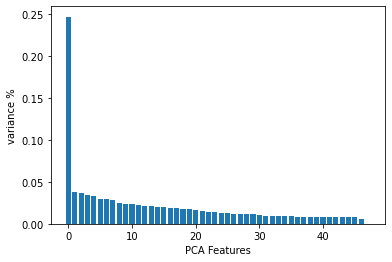

In [170]:
# Plot the explained variances
features = range(item_to_id.shape[0])
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA Features')
plt.ylabel('variance %')

In [67]:
# Save the components to a DataFrame
items_pca = pd.DataFrame(items_pca, index=user_item_counts.columns, columns=[index+1 for index in range(item_to_id.shape[0])])
items_pca

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Item_ID,,,,,,,,,,,,,,,,,,,,,
1,0.355639,-0.025103,-0.051129,-0.039214,-0.049529,0.003300,0.019830,-0.011458,0.084798,-0.042284,...,-0.019760,-0.012837,-0.006332,-0.022289,-0.002654,-0.001332,0.011263,-0.026911,-0.129284,6.162282e-17
2,0.793894,-0.041103,0.013244,-0.009035,-0.141627,-0.036540,-0.114816,-0.087070,0.000959,-0.035030,...,-0.039028,-0.015895,-0.027280,0.017406,0.013680,0.004437,-0.030161,0.006713,0.379136,6.162282e-17
3,0.135668,-0.029584,-0.028246,-0.012556,-0.013317,0.004220,-0.020503,-0.050246,0.177599,-0.080864,...,0.020455,-0.007168,0.040652,0.004387,0.029288,0.000224,0.009908,0.001288,-0.035429,6.162282e-17
4,-0.532034,0.020259,-0.022628,-0.037650,0.022756,-0.046219,0.042124,-0.132828,0.651482,-0.274771,...,0.000133,0.002444,0.005894,-0.003617,-0.005383,0.001555,-0.006114,0.007527,0.020217,6.162282e-17
5,-0.678770,-0.093874,-0.347623,-0.232866,-0.090366,-0.057124,-0.018074,0.038866,-0.048059,-0.014378,...,-0.008466,0.011890,0.002598,0.007605,0.009321,-0.003278,0.006540,0.000677,0.023603,6.162282e-17
6,0.312811,-0.036128,0.044851,0.017309,-0.035048,0.080819,-0.047894,-0.021530,0.119243,0.409097,...,-0.020227,0.037458,-0.003532,-0.068856,0.111363,0.038920,-0.179474,0.195229,-0.039911,6.162282e-17
7,-0.550273,-0.188354,0.058120,0.381101,-0.032518,-0.001882,-0.036626,-0.035533,-0.078704,0.033615,...,-0.003264,0.000230,-0.004935,0.009531,0.007640,0.003959,0.010467,0.000722,0.013446,6.162282e-17
8,-0.052373,0.402611,-0.084719,0.101044,0.061785,0.033619,-0.072494,-0.017836,-0.039679,0.006366,...,0.005499,-0.024467,-0.008533,-0.014347,0.004348,-0.003086,0.009040,-0.013534,-0.003083,6.162282e-17
9,0.337225,-0.088904,-0.039285,-0.046014,-0.062167,0.323283,0.195053,-0.089987,-0.061351,-0.085907,...,0.005030,0.248475,0.074118,-0.045950,-0.022483,-0.111802,-0.022843,-0.095708,0.006773,6.162282e-17


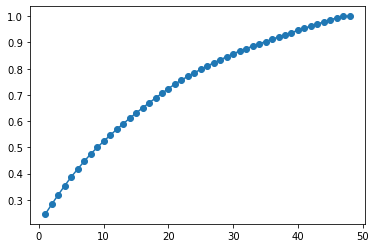

In [71]:
explained_variance_by_k = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_variance_by_k)+1), explained_variance_by_k,marker='o')

In [99]:
# K-means clustering with PCA
square_sum = []
silhouettes = []
for i in range(2, 30):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)
    kmeans_pca = kmeans_pca.fit(items_pca)
    label = kmeans_pca.predict(items_pca)
    square_sum.append(kmeans_pca.inertia_)
    
    silhouettes.append(silhouette_score(items_pca,label))

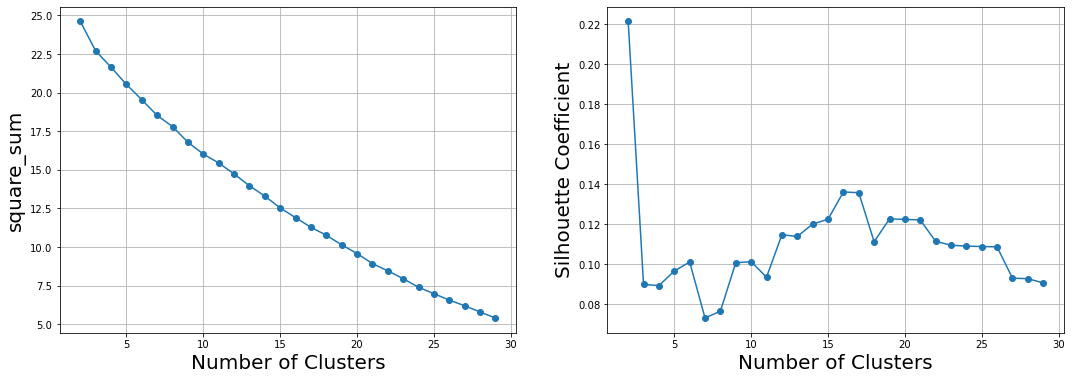

In [106]:
# Plotting the square-sum against the number of clusters, and use elbow method to find best k
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(range(2,30),square_sum,marker='o')
ax[0].set_xlabel('Number of Clusters',size=20)
ax[0].set_ylabel('square_sum',size=20)
ax[0].grid(True)
#plt.title('K-means with PCA Clustering',size=25)

ax[1].plot(range(2,30),silhouettes, Label='Silhouette Coefficient',marker='o')
ax[1].set_xlabel('Number of Clusters',size=20)
ax[1].set_ylabel('Silhouette Coefficient',size=20)
ax[1].grid(True)

In [110]:
# build k-means model
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans = kmeans.fit(items_pca)
label = kmeans.predict(items_pca)

In [112]:
# PCA for dimension reduction
pca = PCA(n_components =2, random_state=42)
pca = pca.fit(items_pca)
pca_feature = pca.transform(items_pca)

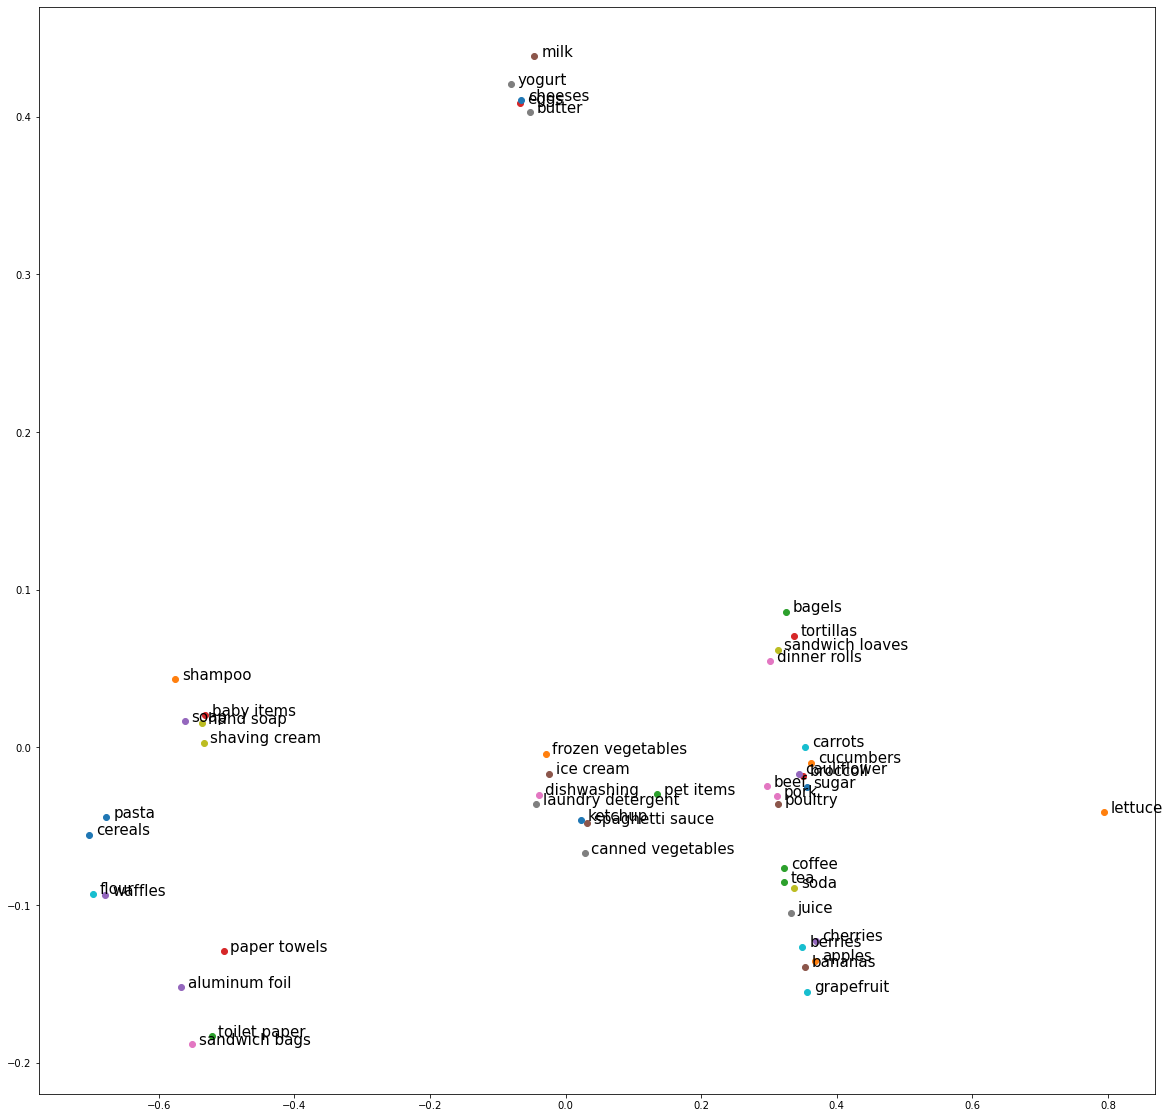

In [128]:
# Visualization
fig,ax=plt.subplots(figsize=(20,20))
for i in range(len(pca_feature)):
    x=pca_feature[i][0]
    y=pca_feature[i][1]
    ax.plot(x,y,'o')
    name = item_to_id[item_to_id.index == i+1]['Item_name']
    ax.annotate(xy=(x+0.01, y), s=name.values[0], fontsize=15)

In [135]:
df = pd.DataFrame({'Item_id': list(range(1,49)),'label':label})
df = pd.merge(left = df, right=item_to_id, on='Item_id', how='left')

for i in range(0,18):
    print(i,'\t', list(df[df['label']==i]['Item_name']))

0 	 ['sugar', 'soda', 'tea', 'juice', 'coffee']
1 	 ['flour']
2 	 ['aluminum foil']
3 	 ['lettuce', 'carrots', 'cucumbers', 'broccoli', 'cauliflower']
4 	 ['butter', 'eggs', 'milk', 'cheeses', 'yogurt']
5 	 ['soap']
6 	 ['poultry', 'beef', 'pork']
7 	 ['pet items', 'grapefruit', 'cherries', 'apples', 'berries', 'bananas']
8 	 ['cereals']
9 	 ['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
10 	 ['spaghetti sauce', 'canned vegetables', 'ketchup']
11 	 ['pasta']
12 	 ['laundry detergent', 'dishwashing\xa0']
13 	 ['baby items']
14 	 ['waffles']
15 	 ['frozen vegetables', 'ice cream']
16 	 ['shampoo', 'shaving cream', 'hand soap']
17 	 ['sandwich bags', 'paper towels', 'toilet paper']
